In [1]:
import numpy as np
import pandas as pd

In [6]:
train =  pd.read_csv("../trainFullNumber.csv",encoding = "utf-8",header = None)
print(train.head())
print(".............")
trainx = train.iloc[:,2:12]
trainy = train.iloc[:,0]
# trainx,trainy

   0                                                  1    2    3      4    \
0    1  1 -666 -888 -888 -888 -888 -888 -888 -888 -888...    1 -666 -888.0   
1    1  1 -888 -888 -888 -888 -888 -888 -888 -888 -888...    1 -888 -888.0   
2    2  1 -888 -888 -888 -888 -666 -888 -888 -888 -666...    1 -888 -888.0   
3    2  1 -666 -666 -666 -666 -666 -666 -666 -666 -666...    1 -666 -666.0   
4    2  1 -666 -666 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 ...    1 -666 -666.0   

     5      6      7      8      9   ...   235  236  237  238  239  240  241  \
0 -888.0 -888.0 -888.0 -888.0 -888.0 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1 -888.0 -888.0 -888.0 -888.0 -888.0 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -888.0 -888.0 -666.0 -888.0 -888.0 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -666.0 -666.0 -666.0 -666.0 -666.0 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4    8.0    8.0    8.0    8.0    8.0 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   242  243  244  
0  NaN  NaN  NaN  
1  NaN  NaN 

In [9]:
trainx.fillna(-888,inplace = True)
trainx.isnull().sum()

2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf0 = RandomForestClassifier(oob_score=True, random_state=10)
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size = 0.3,random_state=10)
rf0.fit(x_train,y_train)
pre = rf0.predict(x_test)
print(accuracy_score(pre,y_test))

0.9927114559454535


d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\gongju\python3.6 64\anzhuang\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [20]:
def my_confusion_matrix(y_true, y_pred):  
    from sklearn.metrics import confusion_matrix  
    labels = list(set(y_true))  
    conf_mat = confusion_matrix(y_true, y_pred, labels = labels)  
    print ("confusion_matrix(left labels: y_true, up labels: y_pred):"  )
    print ("labels\t",  )
    for i in range(len(labels)):  
        print (labels[i],"\t",  )
    print   
    for i in range(len(conf_mat)):  
        print (i,"\t",  )
        for j in range(len(conf_mat[i])):  
            print (conf_mat[i][j],'\t',  )
        print   
    print   

def plot_confusion_matrix(y_true, y_pred, labels):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    cmap = plt.cm.binary
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    intFlag = 0 # 标记在图片中对文字是整数型还是浮点型
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        #

        if (intFlag):
            c = cm[y_val][x_val]
            plt.text(x_val, y_val, "%d" % (c,), color='red', fontsize=8, va='center', ha='center')

        else:
            c = cm_normalized[y_val][x_val]
            if (c > 0.01):
                #这里是绘制数字，可以对数字大小和颜色进行修改
                plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
            else:
                plt.text(x_val, y_val, "%d" % (0,), color='red', fontsize=7, va='center', ha='center')
    if(intFlag):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    else:
        plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.title('')
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('Index of True Classes')
    plt.xlabel('Index of Predict Classes')
#     plt.savefig('confusion_matrix.jpg', dpi=300)
    plt.show()

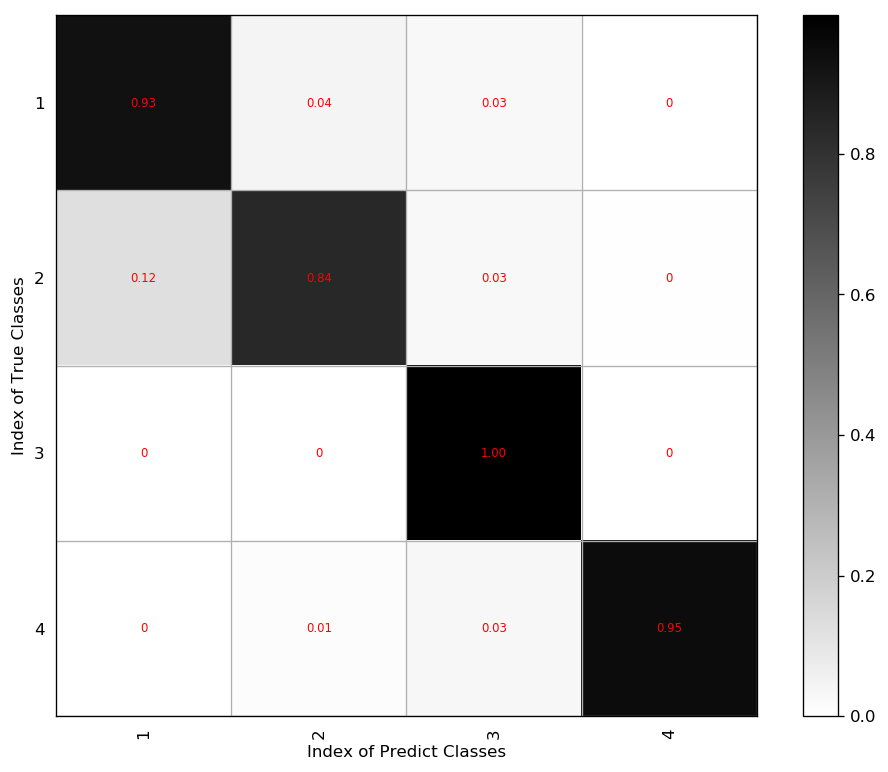

In [21]:
# my_confusion_matrix(pre,y_test)
labels = [1,2,3,4]
plot_confusion_matrix(pre,y_test,labels)